(regression)=
# Linear regression



The goal in this chapter is to introduce **_linear regression_**, the standard tool that statisticians rely on when analysing the relationship between interval scale predictors and interval scale outcomes. Stripped to its bare essentials, linear regression models are basically a slightly fancier version of the [Pearson correlation](correl) though as we'll see, regression models are much more powerful tools.

Since the basic ideas in regression are closely tied to correlation, we'll return to the `parenthood.csv` file that we were using to illustrate how correlations work. Recall that, in this data set, we were trying to find out why Dan is so very grumpy all the time, and our working hypothesis was that I'm not getting enough sleep. 

In [1]:
import pandas as pd

file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/parenthood.csv'
df = pd.read_csv(file)

df.head()

,dan_sleep,baby_sleep,dan_grump,day
0,7.59,10.18,56,1
1,7.91,11.66,60,2
2,5.14,7.92,82,3
3,7.71,9.61,55,4
4,6.68,9.75,67,5


We drew some scatterplots to help us examine the relationship between the amount of sleep I get, and my grumpiness the following day. 

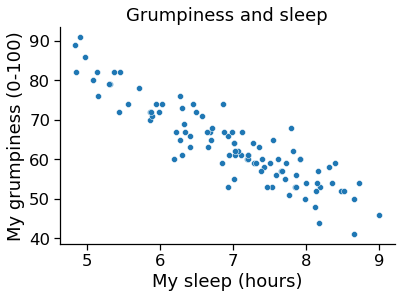

In [13]:
from myst_nb import glue
import seaborn as sns
sns.set_context("notebook", font_scale=1.5)
ax = sns.scatterplot(data = df,
                x = 'dan_sleep', 
                y = 'dan_grump')
ax.set(title = 'Grumpiness and sleep', ylabel = 'My grumpiness (0-100)', xlabel='My sleep (hours)')
sns.despine()

glue("sleepycorrelation_fig", ax, display=False)

 ```{glue:figure} sleepycorrelation-fig
:figwidth: 600px
:name: fig-sleepycorrelation

Scatterplot showing grumpiness as a function of hours slept.

```


The actual scatterplot that we draw is the one shown in {numref}`sleepycorrelation-fig`, and as we saw previously this corresponds to a correlation of $r=-.90$, but what we find ourselves secretly imagining is something that looks closer to Figure \@ref(fig:regression1a). That is, we mentally draw a straight line through the middle of the data. In statistics, this line that we're drawing is called a **_regression line_**. Notice that -- since we're not idiots -- the regression line goes through the middle of the data. We don't find ourselves imagining anything like the rather silly plot shown in Figure \@ref(fig:regression1b). 

In [37]:
import statsmodels.formula.api as smf
model = smf.ols(formula="dan_grump ~ dan_sleep", data=df).fit()
intercept = model.params.Intercept
slope = model.params.dan_sleep

Intercept    125.956292
dan_sleep     -8.936756
dtype: float64

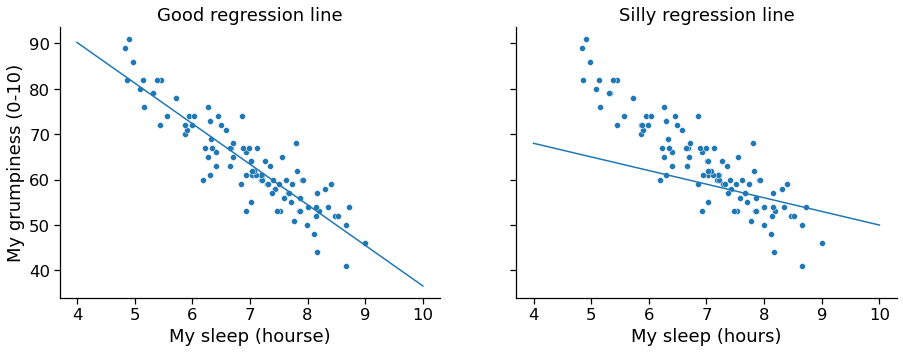

In [40]:
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

model = smf.ols(formula="dan_grump ~ dan_sleep", data=df).fit()
intercept = model.params.Intercept
slope = model.params.dan_sleep


fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

x = np.linspace(4,10)


sns.scatterplot(data = df, x = 'dan_sleep', y = 'dan_grump', ax = axes[0])
fig.axes[0].set_title("The best-fitting regression line")
fig.axes[0].set_xlabel("My sleep (hourse)")
fig.axes[0].set_ylabel("My grumpiness (0-10)")
fig.axes[0].plot(x,slope*x+intercept)

sns.scatterplot(data = df, x = 'dan_sleep', y = 'dan_grump', ax = axes[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel("My sleep (hours)")
fig.axes[1].set_ylabel("My grumpiness (0-10)")
fig.axes[1].plot(x,-3*x+80)

sns.despine()

glue("sleep_scatter-fig1", fig, display=False)

This is not highly surprising: the line that I've drawn in Figure \@ref(fig:regression1b) doesn't "fit" the data very well, so it doesn't make a lot of sense to propose it as a way of summarising the data, right? This is a very simple observation to make, but it turns out to be very powerful when we start trying to wrap just a little bit of maths around it. To do so, let's start with a refresher of some high school maths. The formula for a straight line is usually written like this:

$$
y = mx + c
$$ 




Or, at least, that's what it was when I went to high school all those years ago. The two *variables* are $x$ and $y$, and we have two *coefficients*, $m$ and $c$. The coefficient $m$ represents the *slope* of the line, and the coefficient $c$ represents the *$y$-intercept* of the line. Digging further back into our decaying memories of high school (sorry, for some of us high school was a long time ago), we remember that the intercept is interpreted as "the value of $y$ that you get when $x=0$". Similarly, a slope of $m$ means that if you increase the $x$-value by 1 unit, then the $y$-value goes up by $m$ units; a negative slope means that the $y$-value would go down rather than up. Ah yes, it's all coming back to me now. 

Now that we've remembered that, it should come as no surprise to discover that we use the exact same formula to describe a regression line. If $Y$ is the outcome variable (the DV) and $X$ is the predictor variable (the IV), then the formula that describes our regression is written like this:

$$
\hat{Y_i} = b_1 X_i + b_0
$$

Hm. Looks like the same formula, but there's some extra frilly bits in this version. Let's make sure we understand them. Firstly, notice that I've written $X_i$ and $Y_i$ rather than just plain old $X$ and $Y$. This is because we want to remember that we're dealing with actual data. In this equation, $X_i$ is the value of predictor variable for the $i$th observation (i.e., the number of hours of sleep that I got on day $i$ of my little study), and $Y_i$ is the corresponding value of the outcome variable (i.e., my grumpiness on that day). And although I haven't said so explicitly in the equation, what we're assuming is that this formula works for all observations in the data set (i.e., for all $i$). Secondly, notice that I wrote $\hat{Y}_i$ and not $Y_i$. This is because we want to make the distinction between the *actual data* $Y_i$, and the *estimate* $\hat{Y}_i$ (i.e., the prediction that our regression line is making). Thirdly, I changed the letters used to describe the coefficients from $m$ and $c$ to $b_1$ and $b_0$. That's just the way that statisticians like to refer to the coefficients in a regression model. I've no idea why they chose $b$, but that's what they did. In any case $b_0$ always refers to the intercept term, and $b_1$ refers to the slope.


Excellent, excellent. Next, I can't help but notice that -- regardless of whether we're talking about the good regression line or the bad one -- the data don't fall perfectly on the line. Or, to say it another way, the data $Y_i$ are not identical to the predictions of the regression model $\hat{Y_i}$. Since statisticians love to attach letters, names and numbers to everything, let's refer to the difference between the model prediction and that actual data point as a *residual*, and we'll refer to it as $\epsilon_i$.[^noteepsilon] Written using mathematics, the residuals are defined as:

$$
\epsilon_i = Y_i - \hat{Y}_i
$$

which in turn means that we can write down the complete linear regression model as:

$$
Y_i = b_1 X_i + b_0 + \epsilon_i
$$

[^noteepsilon]: The $\epsilon$ symbol is the Greek letter epsilon. It's traditional to use $\epsilon_i$ or $e_i$ to denote a residual.